In [0]:
# Import des librairies 
import pandas as pd 
import numpy as np 

In [14]:
# Import du fichier 
from google.colab import files 
upload = files.upload()

In [15]:
# Lecture du fichier 
dataset = pd.read_csv("Wine_grading.csv")
dataset.head()

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grade
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [16]:
# Gestion des valeurs manquantes 
dataset.isnull().any()

Unnamed: 0                      False
alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
Grade                           False
dtype: bool

In [0]:
# Séparation des X et y 
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

In [0]:
# Normalisation 
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler()
X = sc_x.fit_transform(X)

In [0]:
# Train Test Split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
# Création d'un arbre de décision 
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
# Evaluation du modèle 
print("Train score: {}".format(classifier.score(X_train, y_train)))
print("Test score: {}".format(classifier.score(X_test, y_test)))

Train score: 1.0
Test score: 0.8888888888888888


In [36]:
# Notre score est déjà très bon mais tentons le avec une random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
print("Train score: {}".format(classifier.score(X_train, y_train)))
print("Test score: {}".format(classifier.score(X_test, y_test)))

Train score: 1.0
Test score: 1.0


In [0]:
# Matrice de confusion 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, classifier.predict(X_test))

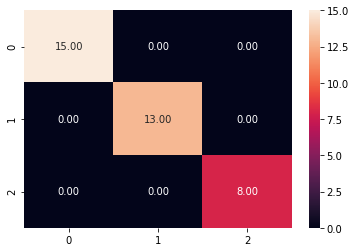

In [39]:
# Visualisation de la matrice 
import seaborn as sns 
sns.heatmap(cm, annot=True, fmt=".2f")

In [40]:
# Feature importance 
feature_importance = pd.DataFrame({"Features": dataset.columns[1:-1],
                                   "Value": classifier.feature_importances_})

feature_importance.sort_values(["Value"], ascending=False)

,Features,Value
12,proline,0.157616
9,color_intensity,0.154062
6,flavanoids,0.152606
0,alcohol,0.129262
11,od280/od315_of_diluted_wines,0.124492
10,hue,0.084501
5,total_phenols,0.051514
1,malic_acid,0.035420
4,magnesium,0.029401
8,proanthocyanins,0.026602
